# 15/01/2024 Inferences with the Non Farm Payrolls (NFP)

We are going to run the central limit theorem practices as well as finding point estimators, confidence intervals, and hypotheis tetsing for a hypothesized mean, finally we will find the confidence interval for the proportion. 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use("bmh")

In [2]:
nfp = pd.read_excel("nfp_without_outliers.xlsx")

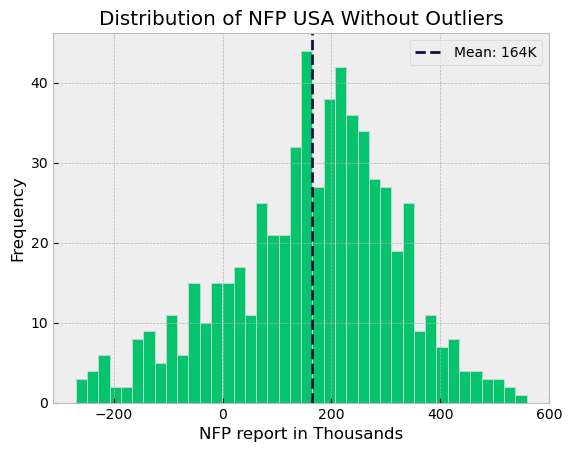

In [3]:
plt.hist(nfp["Actual"], color = "#05c46b", edgecolor = "#d2dae2", bins = 40)
plt.title("Distribution of NFP USA Without Outliers")
plt.xlabel("NFP report in Thousands")
plt.ylabel("Frequency")
plt.axvline(nfp["Actual"].mean(), linestyle = "--", 
            label = f"Mean: {round(nfp['Actual'].mean())}K", color = "#130f40")
plt.legend()
plt.show()

In [4]:
nfp["Actual"].describe()

count    610.000000
mean     163.959016
std      155.665318
min     -270.000000
25%       74.000000
50%      179.500000
75%      267.750000
max      559.000000
Name: Actual, dtype: float64

# Sampling

We are going to sample a dataset where we removed outliers based on the 1.5 multiplication standard where every observation that is < Q1 - 1.5(IQRQ) is an outlier as well as > Q3 + 1.5(IQR).

It is important to mention that the removed outliers represent less than 7% of the overall dataset and we have removed upper and lower outliers, meaning that we aren't showing favour towards something significantly enough in order to apply inferences with the central limit theorem. We need to be careful with a sampling that contains Bias. 

# Sampling Distribution of the Sample Mean (SDSM)

We are going to take a sample of 3 from this dataset because since the report comes out every Friday of each month we are going to take a sample of a trymester, therefore we desire to see all the possible samples of 3 from all the data observations of the overall dataset or population; it would be **N ** n**. 

However. . . there is a problem, **we can't compute 610 ** 3 samples which is 226 981 000 million samples!!!** since we have so large possible samples we can't compute it even with my computer, plotting its respective distribution of that amount of samples. 

In [5]:
len(nfp) # we have 610 data points, so we want 610 ** 3 samples

610

In [6]:
import itertools # we would do this with this modeule but not this time

In [7]:
population = list(nfp["Actual"])

**We are going to take 40 data observations to inference the population parameter based on the mean statistic of the sample for the current population and for the rest of the data of NFP that will be coming the following first Fridays of each month.**

In [8]:
random_40 = np.random.choice(population, 40) 
random_40

array([ -94,  200,  196,  257,  124,  290,   77,  437,  145,  276,  112,
        337,  148,  -49,  253,  138,  209,  237,  217,  261,  242,  171,
         68,  276,  294,  -25,   97,  315,  228,  531,   24,  488, -140,
         18,   40,  213,  187,  248,  163, -131])

In [56]:
np.mean(random_40)

176.95

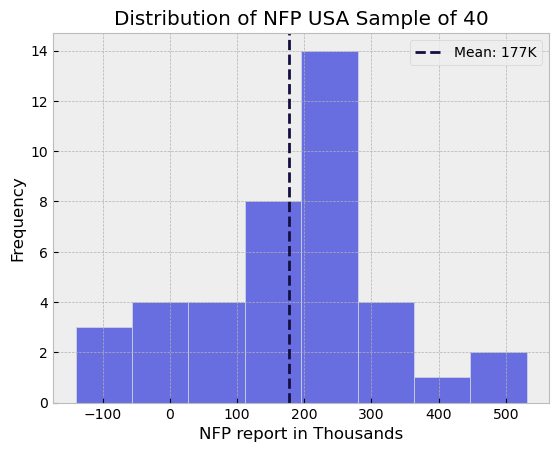

In [57]:
plt.hist(random_40, color = "#686de0", edgecolor = "#d2dae2", bins = 8)
plt.title("Distribution of NFP USA Sample of 40")
plt.xlabel("NFP report in Thousands")
plt.ylabel("Frequency")
plt.axvline(np.mean(random_40), linestyle = "--", 
            label = f"Mean: {round(np.mean(random_40))}K", color = "#130f40")
plt.legend()
plt.show()

In [58]:
from scipy import stats

In [59]:
round(stats.skew(random_40), 2)

-0.06

In [60]:
round(stats.skew(nfp["Actual"]), 2)

-0.41

The normality is even better in the random sample than in the population.

In [61]:
sample_mean = round(np.mean(random_40), 2)
sample_mean

176.95

In [62]:
round(np.mean(nfp["Actual"]), 2)

163.96

The mean is very similar in these two datasets.

In [63]:
round(np.std(random_40), 2)

148.91

In [64]:
O = round(np.std(nfp["Actual"]), 2)
O

155.54

The standard deviation is also very similar in terms of the range of the data distribution of these two which is:

In [65]:
nfp["Actual"].max() - nfp["Actual"].min() # 829 in thousands

829

In [66]:
random_40.max() - random_40.min()

671

# Central limit theorem and Conditions for making inferences with the SDSM

**What is the Central Limit Theorem (CLT):**

It states that when you take repeated random samples from a population, regardless of the population's distribution, the distribution of the sample means will eventually become approximately normal (bell-shaped) as the sample size increases > 30. It is important to note that if the previous population dataset is normally distributed then the Sample Distribution of the Sample Mean will be normally distributed too. The samples must be independent and identically distributed (i.e., random and representative of the population).

the Central Limit Theorem (CLT) is a fundamental theorem in statistics that connects probability and statistics.

+ Why It's Useful in Statistics:

1. Inferences About Populations: It allows us to make inferences about populations based on samples, even if we don't know the exact population distribution.

2. Normal Distribution Benefits: Use well-established statistical methods that rely on normal distributions (e.g., t-tests, confidence intervals, hypothesis testing).

3. Calculate probabilities and determine likelihoods of events Estimating the likelihood of future sample means falling within certain ranges.

5. Understanding Variability: Help assess the variability of sample means and make informed decisions based on data.

+ Examples of Applications:

1. Surveys and Polls: Predicting election outcomes, estimating average customer satisfaction.

2. Quality Control: Testing product samples to ensure they meet quality standards.

3. Medical Research: Evaluating the effectiveness of treatments based on clinical trials.

4. **Finance: Analyzing stock market returns and risks.** <--- this theorem is very useful for this example

The CLT is a cornerstone of statistical inference, enabling us to draw meaningful conclusions from data, even when we don't have complete information about the underlying populations.

**What are the conditions for our inference with the SDSM?**

+ **Normal large counts:** In order to guarantee to be normal we need a sample size > 30 or a normal distributed population, this time we have both conditions, a sample of 40 and a normally distributed population

+ **Random sampling:** We need to sample at random, with the np.random.choice module we select 40 data observations at random but They aren't truly random in the absolute sense, as they're generated by a deterministic algorithm (the Mersenne Twister PRNG). However, they appear random and pass most statistical tests for randomness.

+ **Independent 10% rule:** if we aren't sampling with replacement we need to keep our sample size below 10%, and since we took 40 data observations from our population dataset and our population dataset has 610 data observations we are taking 6.55% of the total population data, so we pass this condition. 

# Confidence Interval 

Generally it is better to find an interval rather than a point estimate of the mean. We can set the rejection region and confidence level threshold to see what is our range normally with the NFPs, in this way we can predict the likelihood reports of the future. 

(a, b) = x bar +- Z critical value * Standard error <-- this is the formula for establishing the confidence interval

+ **x bar:** it represents the mean of the sample, and we are going to sum it to obtain b and rest it to obatain a to the margin of error.

+ **Z critical value:** it is a value of the Z table based on the confidence interval we place, for example in this case we selected a confidence interval of 95% and an alpha value of 5%, so a Z critical value associated in the Z table with a confidence interval of 95% is 1.96.

+ **Standard error:** it is just the standard deviation of the Sample Distribution of the Sample mean (SDSM) or the STD of the population divided by the sample size which in this case is 40.

In [67]:
SE = round(np.std(nfp["Actual"]) / np.sqrt(40))
SE

25

In [68]:
SE_sample = round(np.std(random_40) / np.sqrt(40), 2)
SE_sample

23.55

In [69]:
x = round(np.mean(random_40), 2)
x

176.95

In [70]:
a = round(x - (1.96 * SE))
b = round(x + (1.96 * SE))

In [71]:
interval_nfp = [a, b]
interval_nfp

[128, 226]

We can conclude that we are 95% certain based on the investing webpage report and the central limit theorem with the confidence formula that our next NFP report will be between **128** and **226** NFPs

# Hypothesis testing for the Mean of the NFP

1. State H0: null hypothesis and Ha: alternative hypothesis.
2. Determine the level of significance.
3. Calculate the test statistic finding the Critical value
4. Discover if the critical value falls in rejection region
4. State the conclusion

1. First we start with a hypothesis about the mean of the population parameter, we want to test if the mean of the Non Farm Payrolls (NFP) is 200k, which means we are going to run a two-sided or non-directional test with two regions of rejection. 

+ **H0: NFP mean == 200k**

+ **Ha: NFP != 200k**

2. We are going to determine the level of significance, this time we are going to use a **95% confidence interval**, which means we have an alpha value of 5% (the rejection region) and 2.5% in the upper and lower tails.

the critical value associated with the Z score of 0.975 = 1 - 0.025 --> (0.05 / 2) is **1.96 in the upper tail**

the critical value associated with the Z score of 0.025 is **-1.96 in the lower tail**

**If the Z score we are going to obtain from the Z table is above or below these values we can reject the null hypothesis Ha.**

3. Calculating the test Z statistic:Since we have a standard deviation of the population known, and a sample size > 30 we are going to use the Z test formula, with the sample mean minus the hypothesized mean divided by the standard error of the SDSM which is the standard deviation of the population divided by the square root of the sample size which in this case is 40.

In [31]:
Z = round((sample_mean - 200) / (O / np.sqrt(40)), 2)
Z # 0.1736 is the Z score assciated in the Z table with the critical value of -0.94

-0.94

4. Determine if this Z score or critical value falls in the region of rejection or acceptance: Since our Z critical value is **-0.94** which is between the two lower and upper values at 95% confidence level of **[-1.96, 1.96]** we fail to reject the null hypothesis HO.

The P value for this two tailed test of 0.1736 = 0.8621

Since P > alpha = 0.05 we fail to reject the null hypothesis Ha.



**5. Conclusion: There is statistical evidence that we have at a 95% confidence level that the non farm payrolls NFP is equal to 200k NFP, we provide support for this conclusion based on the sample of 40 observations of the investing data**

# Sampling Distribution of the Sample Proportion

Here we are trying to use the sample proportion to estimate the population proportion where the nfp report is >= 200

In [44]:
random_40

array([ -94,  200,  196,  257,  124,  290,   77,  437,  145,  276,  112,
        337,  148,  -49,  253,  138,  209,  237,  217,  261,  242,  171,
         68,  276,  294,  -25,   97,  315,  228,  531,   24,  488, -140,
         18,   40,  213,  187,  248,  163, -131])

In [45]:
x = sum(random_40 >= 200)
x

20

In [46]:
p = x / len(random_40) # this is our point estimator
p

0.5

Now it is time to set the confidence interval of the proportion at the 95% confidence level.

In [49]:
O_proportion = round(np.sqrt(p * (1 -p)) / np.sqrt(len(random_40)), 2)
O_proportion
# this is the standard error formula for the proportion 
# it is the square root of the successes and failures divided by the lenght of the sample

0.08

In [52]:
a, b = round(p - 1.96 * O_proportion,2), round(p + 1.96 * O_proportion, 2)

In [53]:
[a, b] # this is our confidence interval for the proportion at 95% confidence level

[0.34, 0.66]

**We can say that our confidence interval for this proportion of the NFP reports >= 200k is between 34% and 66%.** 

**What are the conditions for our inference with the SDSP?**

+ **Normal large counts: This rule is differnet than the mean rule to apply inferences with SDSP** In order to guarantee to be normal we need a sample size np >= 5 and n(p - 1) >= 5, this time we have both conditions, we need enough successess and failures. 0.5 * 40 = 20, and we have 0.5 in successess and failures.
+ **Random sampling:** We need to sample at random, with the np.random.choice module we select 40 data observations at random but They aren't truly random in the absolute sense, as they're generated by a deterministic algorithm (the Mersenne Twister PRNG). However, they appear random and pass most statistical tests for randomness.

+ **Independent 10% rule:** if we aren't sampling with replacement we need to keep our sample size below 10%, and since we took 40 data observations from our population dataset and our population dataset has 610 data observations we are taking 6.55% of the total population data, so we pass this condition. 